In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False


In [4]:
#서울 CCTV 표준 데이터 불러오기
cctv=pd.read_csv('cctv.csv', encoding='cp949')
                 
##crime 데이터 읽기 ##2018년도 자료
crime=pd.read_csv("crime.csv", encoding="utf-8")

#범죄검거율 추가
len(cctv.index), len(crime['자치구'])
crime['검거/발생*100']=round(crime['검거-합계']/crime['발생-합계']*100,2)

In [5]:

#카메라대수 인덱스 리스트로 작성
sum_cctv_data=pd.DataFrame(cctv.groupby("관리기관명").sum())
sum_cctv=list(sum_cctv_data['카메라대수'])
sum_cctv=sum_cctv[1:-1] #서울시설공단, 시설관리공단 제거
del sum_cctv[2]; #강북경찰서

In [7]:
#관리기관명 인덱스 추출 및 조작
index=list(sum_cctv_data.index)
index2=[]
for i in index:
    i=(i.replace("서울특별시"," ").strip())
    i=(i.replace("청"," ").strip())
    if(i=="_서초구"):
        i='서초구'
    index2.append(i);
index2=index2[1:-1] #서울시설공단, 시설관리공단 제거
del index2[2];  #강북경찰서

In [8]:
##카메라대수와 관리기관명을 합쳐 하나의 데이터 프레임으로
dict={'카메라대수':pd.Series(sum_cctv, index=index2)}
cctv=pd.DataFrame(dict)

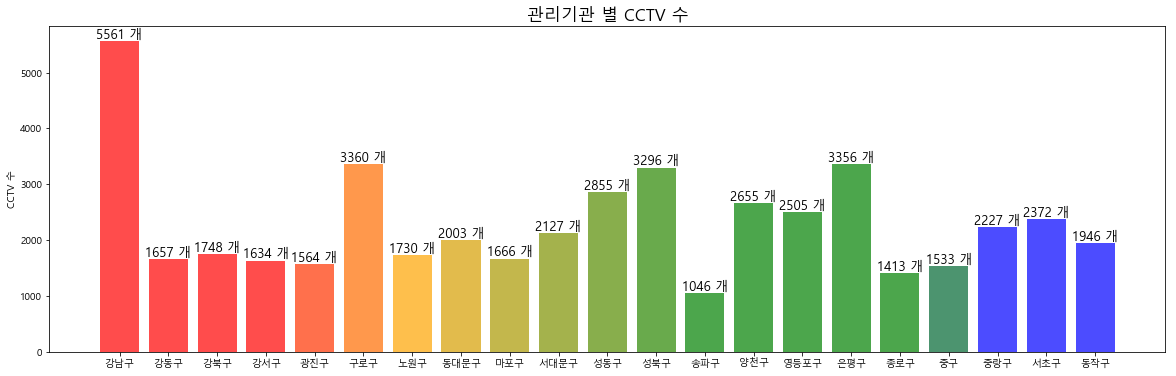

In [9]:
##막대그래프 서울시 관리기관 별 카메라 대수
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
fig=plt.figure(figsize=(20, 6))
x = np.arange(24).astype(float)
r1=plt.bar(cctv.index, cctv['카메라대수'], color=rvb(x/24), alpha=0.7)
plt.title("관리기관 별 CCTV 수", size=17)
plt.ylabel("CCTV 수")

def autolabel(rects, ax): ##bar그래프 위에 몇 개인지 height 나타냄
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.0*height,'%d 개'%int(height),
               ha='center', va='bottom', size=13);
autolabel(r1, plt)


Text(0.5, 1.0, '자치구 별 범죄 발생 횟수 대비 범죄 검거 횟수 (범죄 검거율)')

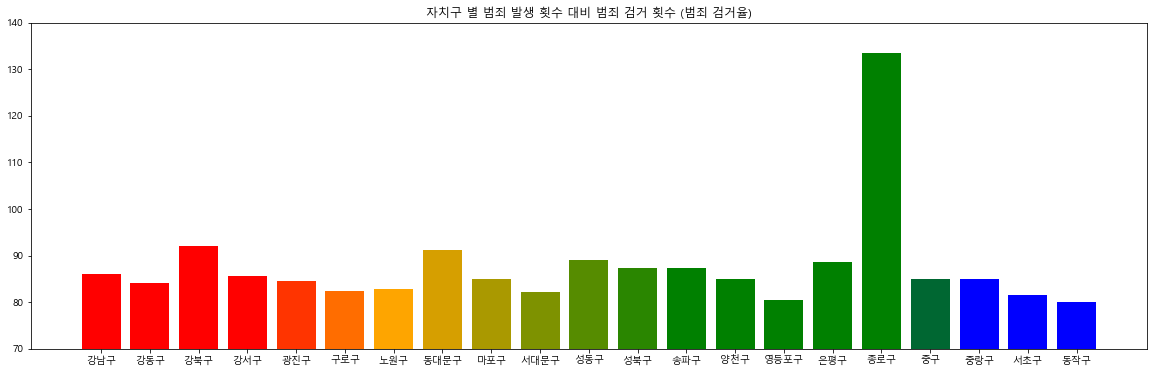

In [10]:
##막대그래프 서울시 구 별 범죄 발생 횟수 대비 검거 횟수 * 100

fig=plt.figure(figsize=(20, 6))
x = np.arange(24).astype(float)
plt.ylim(70, 140)
plt.bar(crime['자치구'],crime['검거/발생*100'], color=rvb(x/24))
plt.title("자치구 별 범죄 발생 횟수 대비 범죄 검거 횟수 (범죄 검거율)")


Text(0.5, 1.0, '자치 구 별 CCTV 수와 2018년 범죄 검거율')

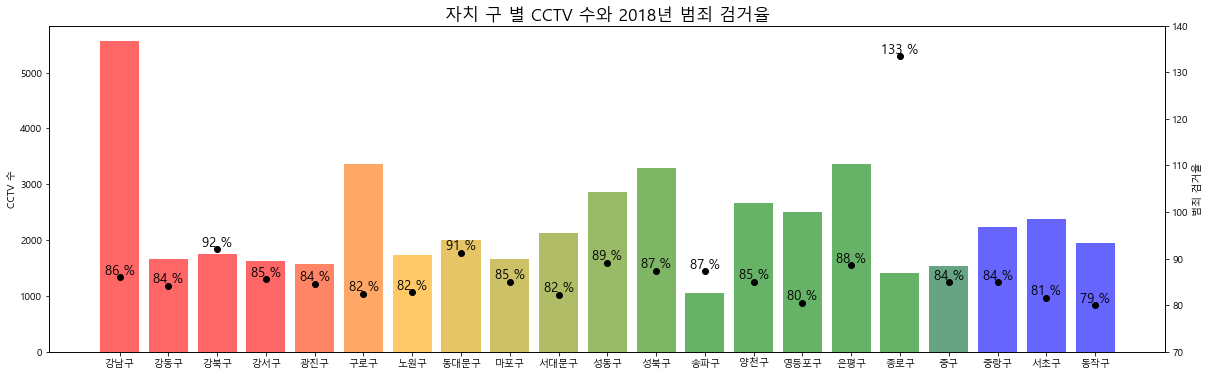

In [20]:
##막대그래프 서울시 관리기관 별 카메라 대수
##산포도 (검정색 점) 발생 횟수 대비 검거 횟수 * 100
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)


x = np.arange(24).astype(float)
fig=plt.figure(figsize=(20, 6))
ax1=fig.subplots()
plt.ylabel("CCTV 수")
ax2=ax1.twinx()
x=np.arange(21)

bar1=ax1.bar(cctv.index, cctv['카메라대수'], color=rvb(x/24), alpha=0.6)
sc2=ax2.scatter(x,crime['검거/발생*100'], color='Black')
bar2=ax2.bar(x, crime['검거/발생*100'],color='red', alpha=0) ##산포도 위 % 나타내기 위한 투명 bar 그래프
plt.ylabel("범죄 검거율")

def autolabel(rects, ax): ##bar그래프 위에 몇 개인지 height 나타냄
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.0*height,'%d %%'%int(height),
               ha='center', va='bottom', size=13);
ax2.set_ylim(70, 140)
autolabel(bar2, ax2)
plt.title("자치 구 별 CCTV 수와 2018년 범죄 검거율", size=17)



(-1.1054682878514517,
 1.100260394659593,
 -1.1064170602940024,
 1.1067767617312878)

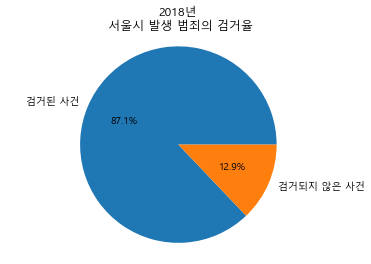

In [18]:
sum_crime=list(crime.sum(axis=0))
sum_crime_index=list(crime.sum(axis=0).index)
##범인이 검거된 사건가 검거되지 않은 사건
data=[sum_crime[2], sum_crime[1]-sum_crime[2]]
index=['검거된 사건', '검거되지 않은 사건']
plt.pie(data, labels=index, autopct='%0.1f%%')
plt.title("2018년\n 서울시 발생 범죄의 검거율")
plt.axis('equal')

([<matplotlib.patches.Wedge at 0x23aa335f780>,
 [Text(1.0999702823802244, 0.00808565893229341, '살인-발생'),
  Text(1.0997437514168664, 0.023741971686390303, '강도-발생'),
  Text(1.0353944409806264, 0.37142745130969557, '강간강제추행-발생'),
  Text(-1.040576467636935, -0.35665195218902035, '절도-발생')],
 [Text(0.5999837903892132, 0.004410359417614586, '0.2%'),
  Text(0.5998602280455635, 0.012950166374394709, '0.2%'),
  Text(0.5647606041712507, 0.20259679162347027, '10.1%'),
  Text(-0.5675871641656007, -0.19453742846673835, '89.5%')])

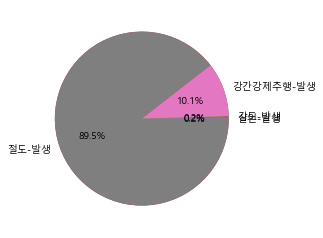

In [13]:
data=[sum_crime[3],sum_crime[5],sum_crime[7],sum_crime[9]]
index=[sum_crime_index[3],sum_crime_index[5],sum_crime_index[7],sum_crime_index[9]]
plt.pie(data)
plt.pie(data, labels=index, autopct='%0.1f%%')
